## 라이브러리 설정

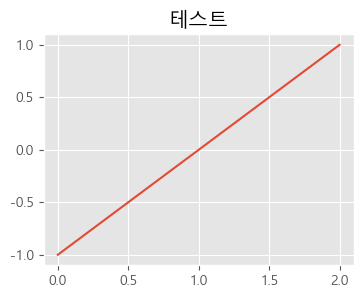

In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

pd.Series([-1,0,1]).plot(figsize=(4,3), title='테스트')
plt.show()

In [2]:
from sklearn.datasets import load_iris
 
# 붓꽃 데이터 로딩
iris = load_iris()
 
iris.keys()
 
# 독립변수
feature = iris.data
feature_name = iris.feature_names
 
# 종속변수
target = iris.target
target_name = iris.target_names
 
# 데이터프레임 만들기
df_iris = pd.DataFrame(feature, columns=feature_name)
df_iris['species'] = target
df_iris.head()
 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df_iris['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

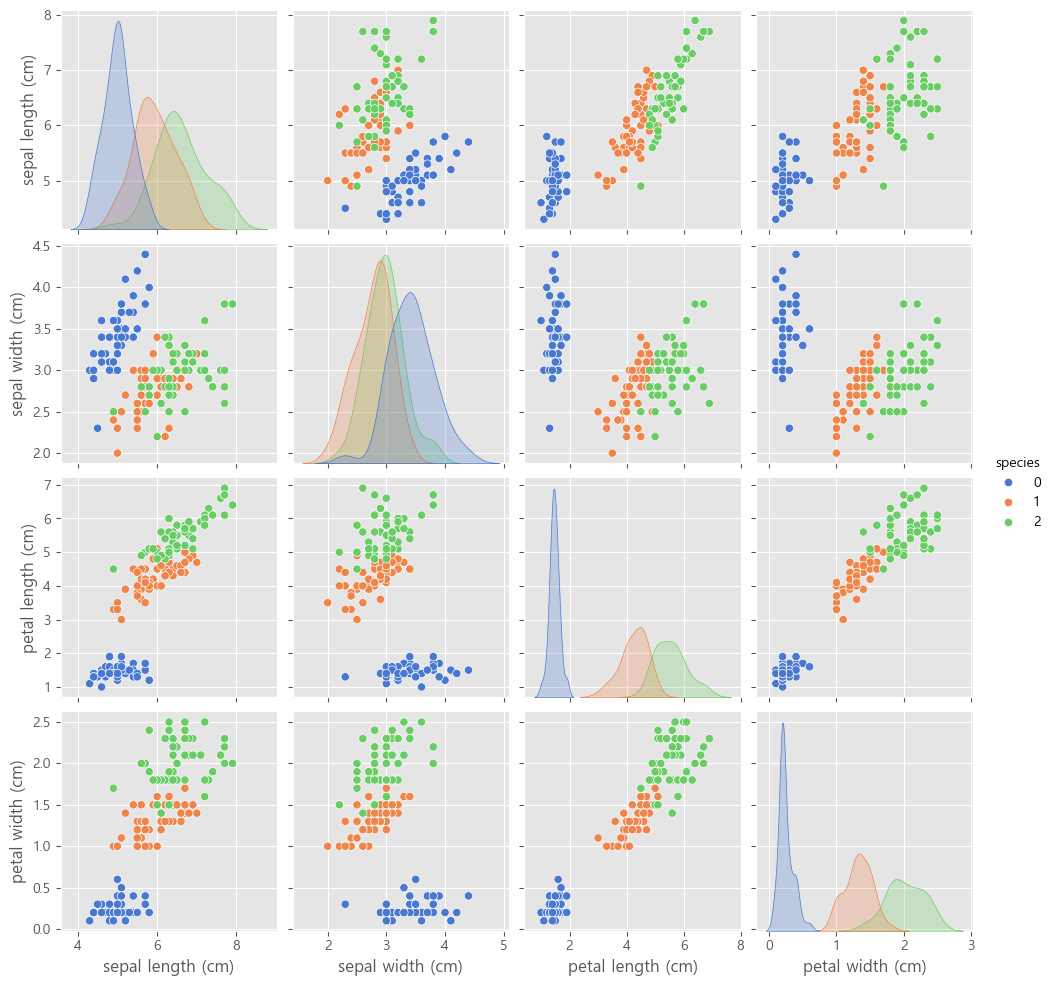

In [7]:
sns.pairplot(data = df_iris, hue='species', palette = 'muted')

## 학습 준비

In [15]:
# 변수 선택
X = feature
y = target


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((120, 4), (30, 4), (120,), (30,))

In [18]:
pd.Series(y_train).value_counts()

0    40
2    40
1    40
Name: count, dtype: int64

## 모델 학습

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
# 테스트 데이터로 예측
pred = model.predict(X_test)
print(f'예측 : {pred}')
print(f'실제 : {y_test}')

# 평가
from sklearn.metrics import accuracy_score,classification_report
print(f'정확도 : {accuracy_score(y_test,pred)}')
print(classification_report(y_test,pred))

예측 : [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]
실제 : [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
정확도 : 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 트리 시각화

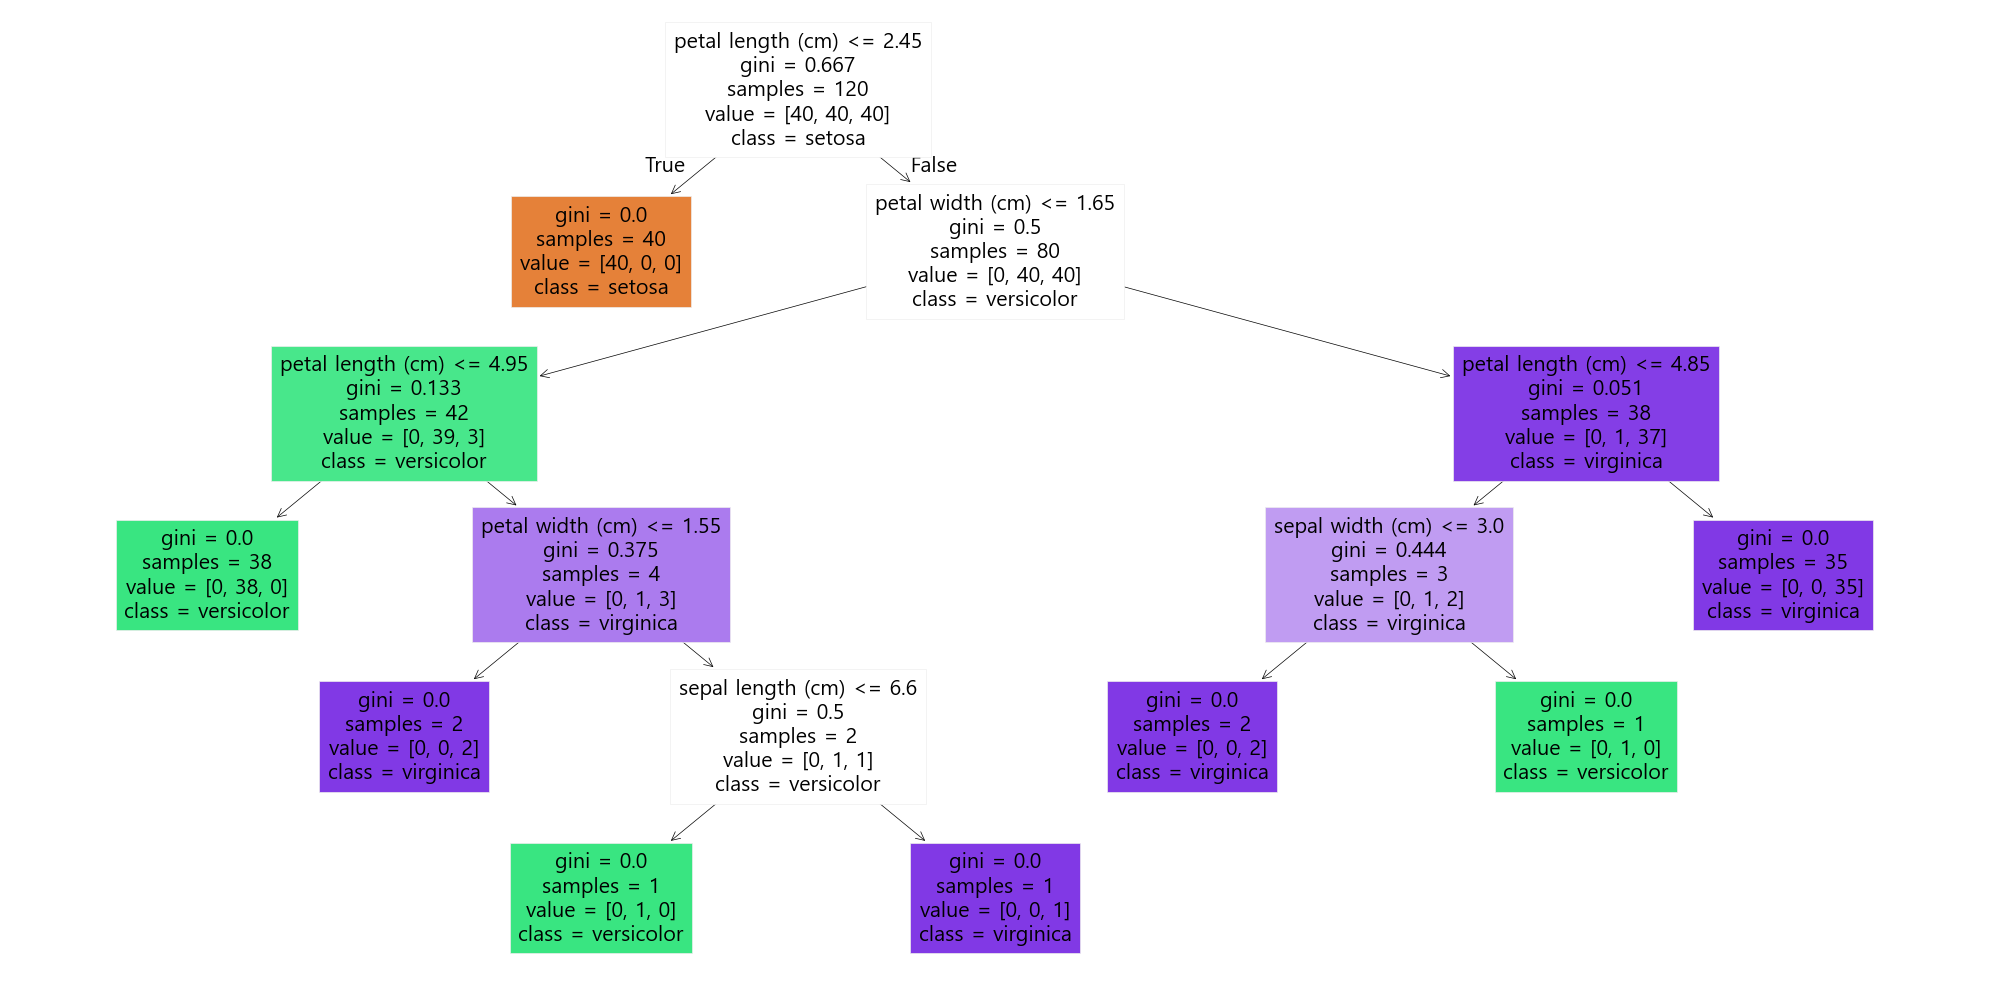

In [37]:
plt.figure(figsize=(20,10))
from sklearn.tree import plot_tree
plot_tree(model,feature_names=feature_name,
          class_names=target_name,
          filled=True)
plt.tight_layout()

특성의 중요도 : [0.0125     0.01666667 0.5585683  0.41226504]


<Axes: >

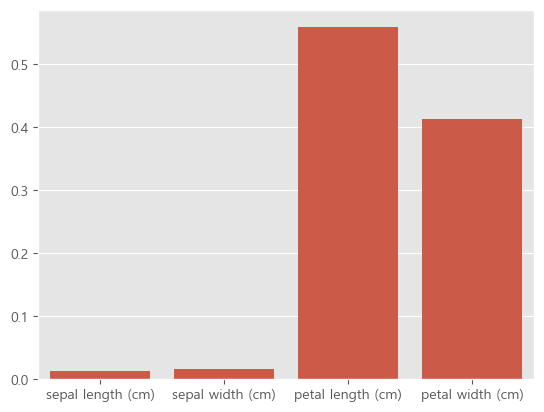

In [39]:
print(f'특성의 중요도 : {model.feature_importances_}')
sns.barplot(x = feature_name, y = model.feature_importances_)

In [40]:
model.get_depth()

5

In [75]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
cv_score = []
for tr_idx,val_idx in kf.split(X_train,y_train):
    X_tr , y_tr = X_train[tr_idx],y_train[tr_idx]     #학습용
    X_val , y_val = X_train[val_idx],y_train[val_idx]  #검증용

    model.fit(X_tr,y_tr)
    pred = model.predict(X_val)
    acc = accuracy_score(y_val,pred)
    print(acc)
    cv_score.append(accuracy_score(y_val,pred))
    #print('-'*50)
    #print(f'tr_idx : {tr_idx}')
    #print(f'val_idx : {val_idx}')

np.mean(cv_score)

1.0
0.8333333333333334
0.8333333333333334
0.9166666666666666
0.9166666666666666


np.float64(0.9)

In [77]:
pred = model.predict(X_val)
print(accuracy_score(y_val,pred))

0.9166666666666666


## GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

model = DecisionTreeClassifier()
model2 = DecisionTreeClassifier()

kf = StratifiedKFold(n_splits=5,shuffle=True)
# 하이퍼파라미터 준비
parameters ={'max_depth':[3,4,5],
            'min_samples_split':[2,4]
            }
# GridSearchCV객체 생성
gscv = GridSearchCV(model, param_grid = parameters, cv = kf, refit = True)
gscv2 = GridSearchCV(model2, param_grid = parameters, cv = kf, refit = True)

gscv.fit(X_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 4]})

In [86]:
pd.DataFrame(gscv.cv_results_)
display(pd.DataFrame(gscv.cv_results_))
print(f'최적의 파라미터 >>> {gscv.best_params_}')
print(f'최고 정확도 >>> {gscv.best_score_:.4f}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002052,0.001077,0.001648,0.000592,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.958333,0.916667,0.958333,0.958333,1.0,0.958333,0.026352,4
1,0.002394,0.000767,0.001680,0.000513,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.958333,1.000000,0.958333,0.958333,1.0,0.975000,0.020412,1
2,0.002110,0.000961,0.001053,0.000548,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.958333,0.958333,0.916667,0.958333,1.0,0.958333,0.026352,4
3,0.000804,0.000235,0.000483,0.000058,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.958333,1.000000,0.958333,0.958333,1.0,0.975000,0.020412,1
4,0.001010,0.000596,0.000560,0.000083,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.958333,0.916667,0.916667,0.958333,1.0,0.950000,0.031180,6
5,0.000912,0.000323,0.000682,0.000321,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.958333,1.000000,0.958333,0.958333,1.0,0.975000,0.020412,1


최적의 파라미터 >>> {'max_depth': 3, 'min_samples_split': 4}
최고 정확도 >>> 0.9750


In [87]:
#최종모델
best_model = gscv.best_estimator_

#최종 테스트
pred = best_model.predict(X_test)
accuracy_score(y_test,pred)

0.9666666666666667

In [88]:
gscv2.fit(X_train,y_train)

pd.DataFrame(gscv2.cv_results_)
display(pd.DataFrame(gscv2.cv_results_))
print(f'최적의 파라미터 >>> {gscv2.best_params_}')
print(f'최고 정확도 >>> {gscv2.best_score_:.4f}')

#최종모델
best_model2 = gscv2.best_estimator_

#최종 테스트
pred2 = best_model2.predict(X_test)
accuracy_score(y_test,pred)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001738,0.001002,0.001316,0.000575,3,2,"{'max_depth': 3, 'min_samples_split': 2}",1.0,0.875000,1.000000,1.0,0.916667,0.958333,0.052705,3
1,0.002400,0.000730,0.002784,0.002773,3,4,"{'max_depth': 3, 'min_samples_split': 4}",1.0,0.875000,1.000000,1.0,0.916667,0.958333,0.052705,3
2,0.005516,0.007150,0.001388,0.000308,4,2,"{'max_depth': 4, 'min_samples_split': 2}",1.0,0.916667,0.958333,1.0,0.916667,0.958333,0.037268,3
3,0.004686,0.004341,0.001312,0.000542,4,4,"{'max_depth': 4, 'min_samples_split': 4}",1.0,0.958333,1.000000,1.0,0.916667,0.975000,0.033333,1
4,0.001954,0.001065,0.000929,0.000504,5,2,"{'max_depth': 5, 'min_samples_split': 2}",1.0,0.833333,1.000000,1.0,0.916667,0.950000,0.066667,6
5,0.000853,0.000176,0.000540,0.000083,5,4,"{'max_depth': 5, 'min_samples_split': 4}",1.0,0.916667,1.000000,1.0,0.916667,0.966667,0.040825,2


최적의 파라미터 >>> {'max_depth': 4, 'min_samples_split': 4}
최고 정확도 >>> 0.9750


0.9666666666666667